In [2]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

In [3]:
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

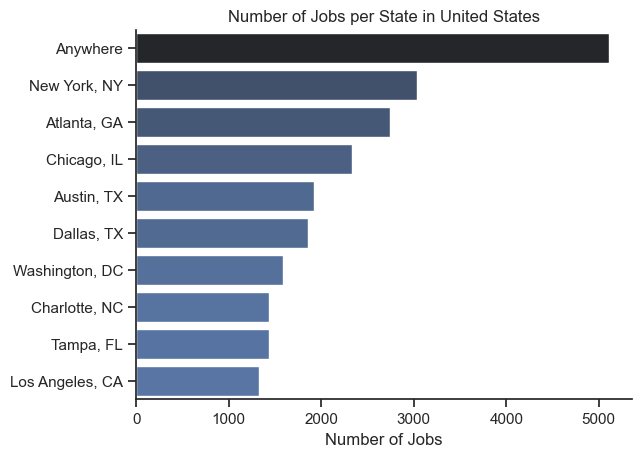

In [6]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Number of Jobs per State in United States')
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()

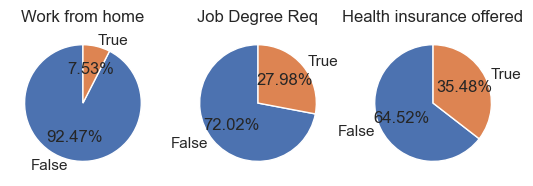

In [7]:
fig, ax = plt.subplots(1, 3)

dict_col = {'job_work_from_home': "Work from home",
            'job_no_degree_mention': 'Job Degree Req',
            'job_health_insurance': "Health insurance offered"
}

for i,(column, title) in enumerate(dict_col.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle = 90, autopct='%1.2f%%', labels = ['False', 'True'])
    ax[i].set_title(title)
plt.show()

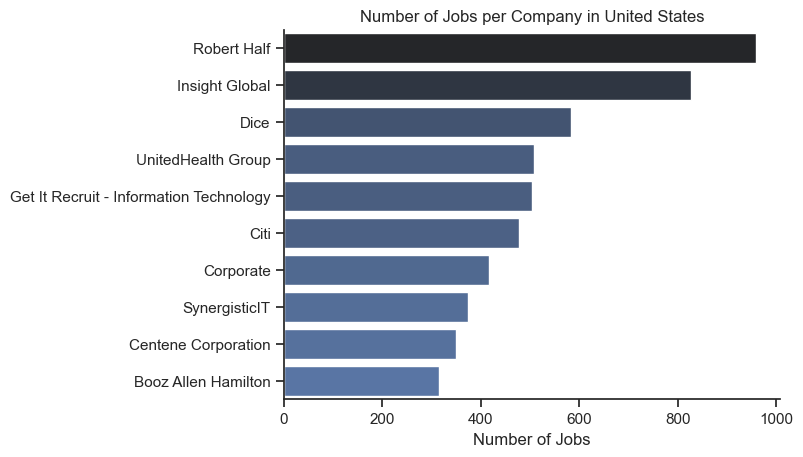

In [8]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Number of Jobs per Company in United States')
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()